# 03H. Multi-component systems

### Mingyang Lu

### 1/23/2025

# ODE integration for a multi-component systems

For a system with more than two components, we can still use the previously introduced function of RK4, *RK4_generic*, for ODE integration. Note that in the following function, the length of the output vector for the derivative function *derivs* should be the same as the length of the initial condition *X0*, both being the number of variables.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 4th order Runge-Kutta (RK4) for a generic multi-variable system
def RK4_generic(derivs, X0, t_total, dt, **kwargs):
    # derivs: the function of the derivatives
    # X0: initial condition, a list of multiple variables
    # t_total: total simulation time, assuming t starts from 0 at the beginning
    # dt: time step size
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    nx = len(X0)
    X_all = np.zeros((n_all, nx))
    X_all[0, :] = X0
    for i in range(n_all - 1):
        t_0 = t_all[i]
        t_0_5 = t_0 + 0.5 * dt
        t_1 = t_0 + dt
        k1 = dt * np.array(derivs(t_0, X_all[i, :], **kwargs))
        k2 = dt * np.array(derivs(t_0_5, X_all[i, :] + k1 / 2, **kwargs))
        k3 = dt * np.array(derivs(t_0_5, X_all[i, :] + k2 / 2, **kwargs))
        k4 = dt * np.array(derivs(t_1, X_all[i, :] + k3, **kwargs))
        X_all[i + 1, :] = X_all[i, :] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return np.column_stack((t_all, X_all))

# A two-gene circuit with a negative feedback loop

In this gene circuit, $X$ activates $Y$, and $Y$ represses $X$. The gene expression dynamics of this circuit can be modeled by a set of ODEs

\begin{equation}
\begin{cases} \frac{dx}{dt} = \frac{g}{1+ y^3} - x \\
              \frac{dy}{dt} = \frac{hx^3}{1+ x^3} - y \end{cases} \tag{1}
\end{equation}

where $x$ and $y$ are the levels of $X$ and $Y$, respectively. $g$ and $h$ are the maximal production rates of $X$ and $Y$, respectively. Nondimensionalization has been applied here to reduce the other parameters. 

In [2]:
def derivs_neg(t, Xs, g, h):
    x = Xs[0]
    y = Xs[1]
    dxdt = g / (1 + y**3) - x
    dydt = h * x**3 / (1 + x**3) - y
    return [dxdt, dydt]

We set $g = h = 10$. First, using the derivative function, we can plot the vector field.

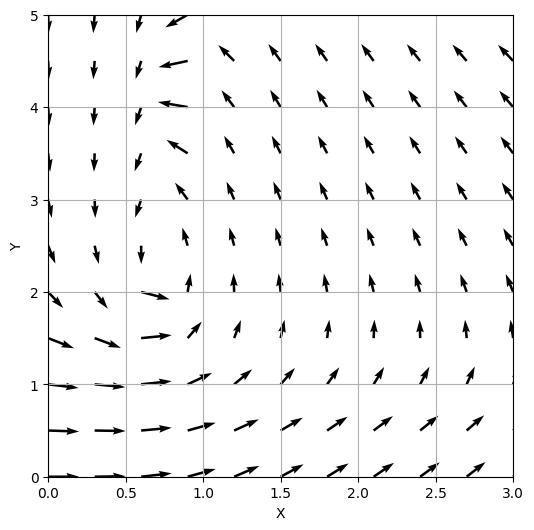

In [3]:
# Parameters
g = 10
h = 10

# Define the grid for X and Y
X_all = np.arange(0, 3.1, 0.3)
Y_all = np.arange(0, 5.1, 0.5)
X, Y = np.meshgrid(X_all, Y_all)

# Initialize arrays for the vector field data
dX = np.zeros_like(X)
dY = np.zeros_like(Y)

# Calculate the vector field
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Xs = np.array([X[i, j], Y[i, j]])
        v = derivs_neg(0, Xs, g, h)
        norm = np.linalg.norm(v)
        dX[i, j] = v[0] / norm
        dY[i, j] = v[1] / norm

# Plot the vector field
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X, Y, dX, dY, scale=5, angles='xy', scale_units='xy')

# Labels and formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim([0, 3])
plt.ylim([0, 5])
plt.grid()
plt.show()

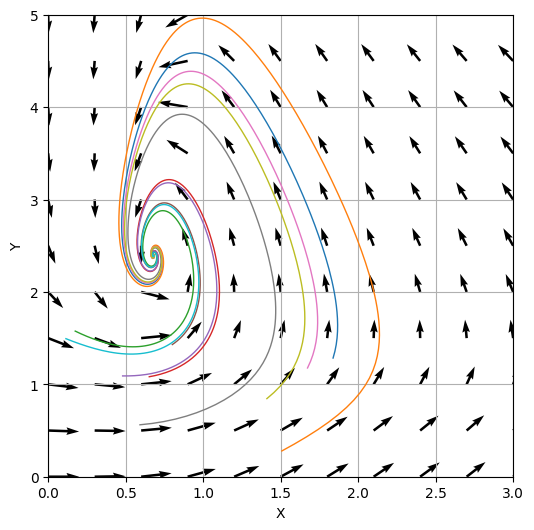

In [4]:
# Generate random initial conditions
np.random.seed(77)
X_init_all = np.random.uniform(0, 2, (10, 2))  # 10 random initial conditions

# Set up time parameters
t_total = 100
dt = 0.01

# Plot the vector field
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X, Y, dX, dY, scale=5, angles='xy', scale_units='xy')

# Plot the trajectories
for i in range(X_init_all.shape[0]):
    results = RK4_generic(derivs_neg, X_init_all[i, :], t_total, dt, g = g, h = h)
    ax.plot(results[:, 1], results[:, 2], linewidth=1)

# Labels and formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim([0, 3])
plt.ylim([0, 5])
plt.grid()
plt.show()

# A two-gene circuit with double-negative feedback loop

We next model a toggle switch circuit with two genes $X$ and $Y$. $X$ suppresses $Y$, and $Y$ suppresses $X$.

The nondimensionalized ODEs for $X$ and $Y$ is

\begin{equation}
\begin{cases} \frac{dx}{dt} = \frac{gy^3}{1+ y^3} - x \\
              \frac{dy}{dt} = \frac{hx^3}{1+ x^3} - y \end{cases} \tag{2}
\end{equation}

In [5]:
def derivs_ts(t, Xs, g, h):
    x = Xs[0]
    y = Xs[1]
    dxdt = g / (1 + y**3) - x
    dydt = h / (1 + x**3) - y
    return [dxdt, dydt]

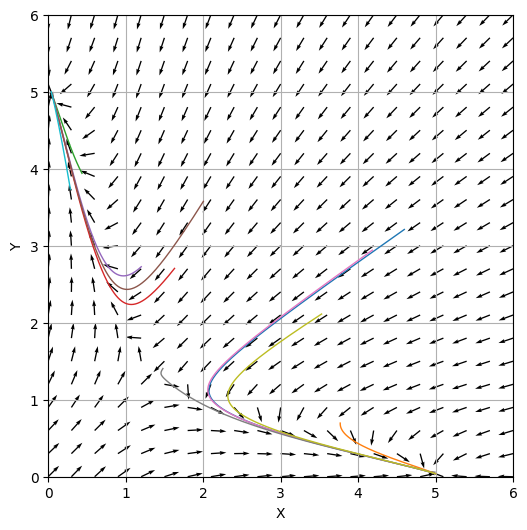

In [6]:
# Generate random initial conditions
np.random.seed(77)
X_init_all = np.random.uniform(0, 5, (10, 2))  # 10 random initial conditions

# Parameters
g = 5
h = 5

# Define the grid for X and Y
X_all = np.arange(0, 6.1, 0.3)
Y_all = np.arange(0, 6.1, 0.3)
X, Y = np.meshgrid(X_all, Y_all)

# Initialize arrays for the vector field data
dX = np.zeros_like(X)
dY = np.zeros_like(Y)

# Calculate the vector field
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Xs = np.array([X[i, j], Y[i, j]])
        v = derivs_ts(0, Xs, g, h)
        norm = np.linalg.norm(v)
        dX[i, j] = v[0] / norm
        dY[i, j] = v[1] / norm

# Plot the vector field
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X, Y, dX, dY, scale=5, angles='xy', scale_units='xy')

# Plot the trajectories
for i in range(X_init_all.shape[0]):
    results = RK4_generic(derivs_ts, X_init_all[i, :], t_total, dt, g = g, h = h)
    ax.plot(results[:, 1], results[:, 2], linewidth=1)

# Labels and formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.grid()
plt.show()

# A three-gene repressilator circuit

In a repressilator circuit, $X$ suppresses $Y$, $Y$ suppresses $Z$, and $Z$ suppresses $X$. The gene expression dynamics of this circuit can be modeled by a set of ODEs

\begin{equation}
\begin{cases} \frac{dx}{dt} = \frac{g}{1+ z^3} - x \\
              \frac{dy}{dt} = \frac{h}{1+ x^3} - y \\
              \frac{dz}{dt} = \frac{l}{1+ y^3} - z \\ \end{cases} \tag{3}
\end{equation}

where $x$, $y$, and $z$ are the levels of $X$, $Y$, and $Z$, respectively. $g$, $h$, $l$ are the maximal production rates of $X$, $Y$, $Z$, respectively.

In [7]:
def derivs_rep(t, Xs, g):
    x = Xs[0]
    y = Xs[1]
    z = Xs[2]
    dxdt = g[0] / (1 + z**3) - x
    dydt = g[1] / (1 + x**3) - y
    dzdt = g[2] / (1 + y**3) - z
    return [dxdt, dydt, dzdt]

We will simulate the 3-variable ODEs and plot the time trajectory along the phase plane of $X$ and $Y$. To show a corresponding vector field in the phase plane, we define the following function to compute ($\frac{dX}{dt}$, $\frac{dY}{dt}$) for any grid point ($X$, $Y$) by assuming

$$\frac{dZ}{dt} = 0$$.

In [8]:
def derivs_rep_xy(t, Xs, g):
    x = Xs[0]
    y = Xs[1]
    z = g[2] / (1 + y**3)
    dxdt = g[0] / (1 + z**3) - x
    dydt = g[1] / (1 + x**3) - y
    return [dxdt, dydt]

We set $g = h = l = 5$. 

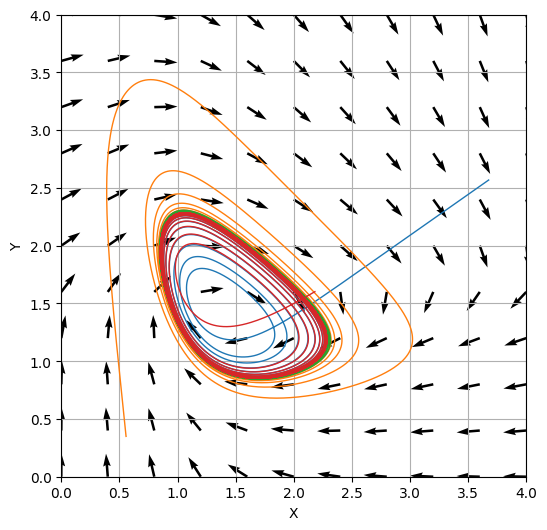

In [9]:
# Generate random initial conditions
np.random.seed(77)
X_init_all = np.random.uniform(0, 4, (4, 3))  # 4 random initial conditions

# Parameters
g = np.array([5, 5, 5])

# Define the grid for X and Y
X_all = np.arange(0, 4.1, 0.4)
Y_all = np.arange(0, 4.1, 0.4)
X, Y = np.meshgrid(X_all, Y_all)

# Initialize arrays for the vector field data
dX = np.zeros_like(X)
dY = np.zeros_like(Y)

# Calculate the vector field
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Xs = np.array([X[i, j], Y[i, j]])
        v = derivs_rep_xy(0, Xs, g)
        norm = np.linalg.norm(v)
        dX[i, j] = v[0] / norm
        dY[i, j] = v[1] / norm

# Plot the vector field
fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X, Y, dX, dY, scale=5, angles='xy', scale_units='xy')

# Plot the trajectories
for i in range(X_init_all.shape[0]):
    results = RK4_generic(derivs_rep, X_init_all[i, :], t_total, dt, g = g)
    ax.plot(results[:, 1], results[:, 2], linewidth=1)

# Labels and formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.grid()
plt.show()

# A many-componenet system

The following example is adopted from Hu et al, Science, 2022. Consider a generalized Lotka-Volterra model to describe population dynamics of many bacteria species:

$$ \frac{dN_i}{dt} = N_i (1 - \sum^S_{j=1}{a_{ij}N_j}) +D $$
$N_i$ is the population size of species $i$, $a_{ij}$ is strength of inhibition from $j$ to $i$, $S$ is the total number of species, $D = 10^{-6}$ is the dispersal rate. $a_{ij}$ is randomly sampled from a uniform distribution (0, $2a$) for $i \ne j$ and 1 for $i=j$. $a$ is the mean interaction strength.

In [10]:
# Define the function for the derivatives
def derivs_many(t, Xs, A, D):
    inter = np.dot(A, Xs)
    dxdt = Xs - Xs * inter + D
    return dxdt

# Define the simulation function
def sim(func, S, a, D, t_total=100):
    # Generate the matrix A with random values
    A = np.random.uniform(0, 2*a, (S, S))
    np.fill_diagonal(A, 1)  # Set diagonal elements to 1

    # Initial conditions
    X0 = np.full(S, 0.1)

    # Run the simulation using the RK4 method
    results = RK4_generic(derivs_many, X0, t_total, 0.01, A = A, D = D)

    # Plot the results
    plt.figure(figsize=(8, 6))
    for i in range(S):
        plt.plot(results[:, 0], results[:, i+1])
    
    plt.xlabel('Time (t)')
    plt.ylabel('N')
    plt.xlim(1, t_total)  # Set x-axis limits
    plt.ylim(1e-6, 1)  # Set y-axis limits
    plt.xscale('log')  # Use linear scale for x-axis
    plt.yscale('log')  # Use log scale for y-axis
    plt.show()

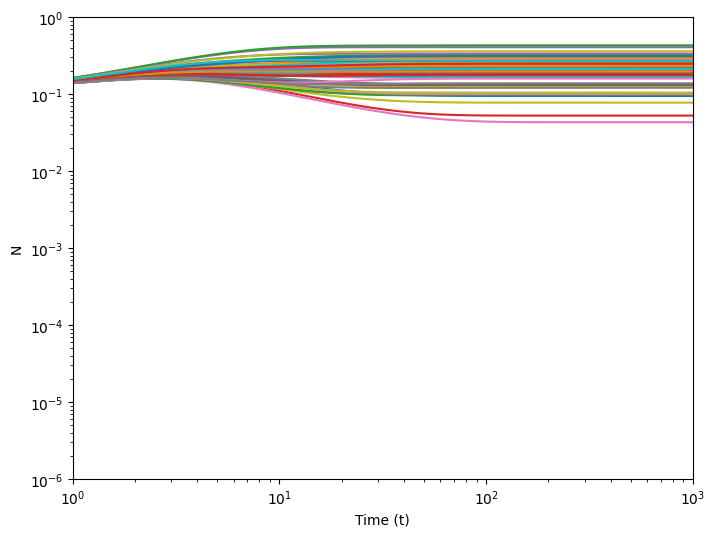

In [11]:
np.random.seed(3)
# Run the simulation 1
sim(derivs_many, S = 50, a = 0.08, D = 1e-6, t_total = 1000)

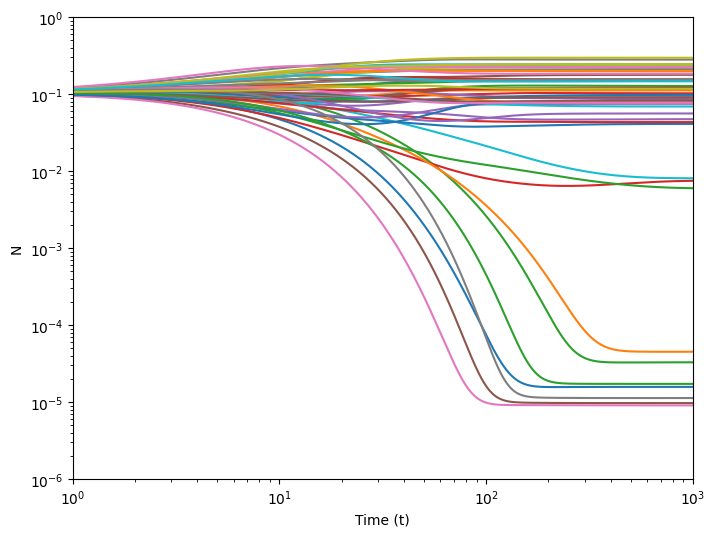

In [12]:
# Run the simulation 2
sim(derivs_many, S = 50, a = 0.16, D = 1e-6, t_total = 1000)

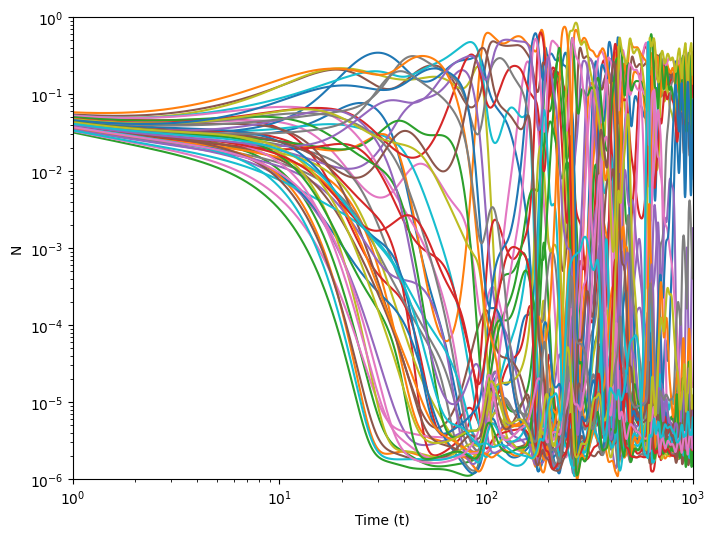

In [13]:
# Run the simulation 3
sim(derivs_many, S = 50, a = 0.64, D = 1e-6, t_total = 1000)